## Importing needed libraries

In [1]:
import sys
sys.path.append("../test/data.py")
from data import load_data
import pandas as pd
print(pd.__version__)
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils

1.0.3


D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

## Functions

In [3]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

## Loding datasets

In [4]:
X_train_temp, X_test_temp, y_train, y_test = load_data()
X_train = X_train_temp.reshape(X_train_temp.shape[0],X_train_temp.shape[1],X_train_temp.shape[2],1)
X_test  = X_test_temp.reshape(X_test_temp.shape[0],X_test_temp.shape[1],X_test_temp.shape[2],1)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7352, 128, 12, 1)
(2947, 128, 12, 1)
(7352, 6)
(2947, 6)


## RNN model

In [6]:
# model_RNN = Sequential()
# model_RNN.add(LSTM(32, input_shape=(row,col))))
# model_RNN.add(Dropout(0.5))
# model_RNN.add(Dense(6, activation='sigmoid'))
# model_RNN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# model_RNN.fit(X_train_temp, y_train, batch_size=16, validation_data=(X_test_temp, y_test), epochs=30)

## CNN model

In [7]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Flatten, LSTM
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

In [8]:
%%html
<img src="./B.jpg">

In [9]:
model = Sequential()
sample = len(X_train)
row = len(X_train[0])
col = len(X_train[0][0])
channel = len(X_train[0][0][0])
validation_split = 0.1

In [10]:
print(sample, row, col, channel)

7352 128 12 1


In [11]:
#Convolutional layer-1: input size=128x12, filter size=13x6, stride=1x3
model.add(Conv2D(filters=4, kernel_size=(13,6), strides=(1,3),  input_shape=(row, col, channel)))

#clipped-Relu
model.add(Activation('relu'))

#BatchNormalization
model.add(BatchNormalization(momentum=0.8))

#Max_pooling layer-1: pool size=2x1, stride=2x1
model.add(MaxPooling2D(pool_size=(2,1), strides=(2,1)))

In [12]:
#Convolutional layer-2
model.add(Conv2D(filters=16, kernel_size=(13,3), strides=(1,1)))

#clipped-Relu
model.add(Activation('relu'))

#BatchNormalization
model.add(BatchNormalization(momentum=0.8))

#Max_pooling layer-2: pool size=2x1, stride=2x1
model.add(MaxPooling2D(pool_size=(2,1), strides=(2,1)))

In [13]:
#Convolutional layer-3
model.add(Conv2D(filters=64, kernel_size=(12,1), strides=(1,1)))

#clipped-Relu
model.add(Activation('relu'))

#BatchNormalization
model.add(BatchNormalization(momentum=0.8))

#Max_pooling layer-3: pool size=2x1, stride=2x1
model.add(MaxPooling2D(pool_size=(2,1), strides=(2,1)))

In [14]:
#Dropout layer: 50%
model.add(Dropout(0.5))

#Flatten
model.add(Flatten())

#Fully-connected layer: softmax
model.add(Dense(6, activation='softmax'))

In [15]:
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 116, 3, 4)         316       
_________________________________________________________________
activation_1 (Activation)    (None, 116, 3, 4)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 116, 3, 4)         16        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 3, 4)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 1, 16)         2512      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 1, 16)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 1, 16)        

In [17]:
train_history = model.fit(X_train, y_train,
                          validation_split=validation_split,
                          batch_size=128, epochs=15)


Train on 6616 samples, validate on 736 samples
Epoch 1/15
6616/6616 [==============================] - 3s 437us/step - loss: 0.8940 - accuracy: 0.7106 - val_loss: 0.3199 - val_accuracy: 0.8546
Epoch 2/15
6616/6616 [==============================] - 3s 436us/step - loss: 0.2838 - accuracy: 0.8984 - val_loss: 0.1892 - val_accuracy: 0.9049
Epoch 3/15
6616/6616 [==============================] - 3s 453us/step - loss: 0.1914 - accuracy: 0.9336 - val_loss: 0.1630 - val_accuracy: 0.9226
Epoch 4/15
6616/6616 [==============================] - 3s 458us/step - loss: 0.1626 - accuracy: 0.9403 - val_loss: 0.1896 - val_accuracy: 0.9022
Epoch 5/15
6616/6616 [==============================] - 3s 463us/step - loss: 0.1441 - accuracy: 0.9477 - val_loss: 0.1802 - val_accuracy: 0.9226
Epoch 6/15
6616/6616 [==============================] - 3s 472us/step - loss: 0.1444 - accuracy: 0.9447 - val_loss: 0.1662 - val_accuracy: 0.9090
Epoch 7/15
6616/6616 [==============================] - 3s 454us/step - loss

In [35]:
import matplotlib.pyplot as plt

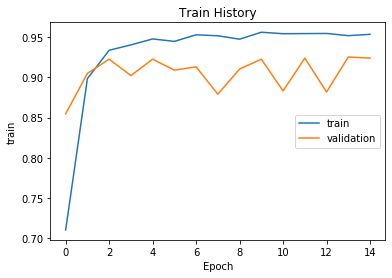

In [36]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

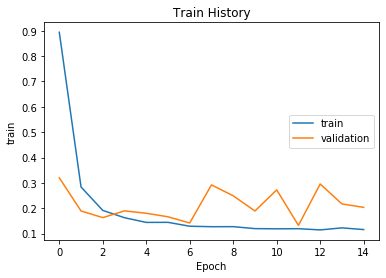

In [39]:
show_train_history(train_history, 'loss', 'val_loss')

In [40]:
score = model.evaluate(X_test, y_test)
print("test accuracy: ", score[1])

2947/2947 [==============================] - 0s 142us/step
test accuracy:  0.9161859750747681
